In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [5]:
LogisticRegression()

LogisticRegression()

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
logreg = LogisticRegression(C=0.0001,penalty='l2',max_iter=1000)
logreg.fit(X_train, y_train)    
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV

array([0.61290323, 0.69354839, 0.64516129, 0.77419355, 0.68852459,
       0.62295082, 0.6557377 , 0.70491803, 0.50819672, 0.60655738])

In [7]:
np.mean(scoreCV)

0.6512691697514542

In [9]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X.columns,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                  Variables  Coefficients
0                 Intercept     -0.625593
1               Pregnancies      0.006513
2                   Glucose      0.013423
3             BloodPressure      0.001393
4             SkinThickness      0.001512
5                   Insulin      0.003609
6                       BMI      0.008273
7  DiabetesPedigreeFunction      0.006052
8                       Age      0.007036


In [10]:
logreg = LogisticRegression(C=0.01,penalty='l2',max_iter=1000)
logreg.fit(X_train, y_train)    
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV
np.mean(scoreCV)

0.7587519830777366

In [11]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X.columns,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                  Variables  Coefficients
0                 Intercept     -0.713106
1               Pregnancies      0.212846
2                   Glucose      0.504936
3             BloodPressure     -0.066062
4             SkinThickness     -0.012284
5                   Insulin      0.045881
6                       BMI      0.313679
7  DiabetesPedigreeFunction      0.205988
8                       Age      0.170932


In [12]:
logreg = LogisticRegression(C=10,penalty='l2',max_iter=1000)
logreg.fit(X_train, y_train)    
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV
np.mean(scoreCV)

0.7816763617133792

In [13]:
logreg = LogisticRegression(C=100,penalty='l2',max_iter=1000)
logreg.fit(X_train, y_train)    
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV
np.mean(scoreCV)

0.7816763617133792

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
C_param_range = [0.001,0.01,0.1,1,10,100,1000,10000]
scoresCV = []
for c in C_param_range:
    logreg = LogisticRegression(C=c,penalty='l2',max_iter=1000)
    logreg.fit(X_train, y_train)    
    scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([c,np.mean(scoreCV)])

In [15]:
df = pd.DataFrame(scoresCV,columns=['C (1/lambda)','Validation Accuracy'])
df

,C (1/lambda),Validation Accuracy
0,0.001,0.651269
1,0.010,0.758752
2,0.100,0.776811
3,1.000,0.781676
4,10.000,0.781676
5,100.000,0.781676
6,1000.000,0.781676
7,10000.000,0.781676


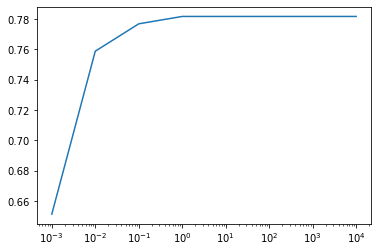

In [16]:
ax = plt.gca()
ax.plot(df['C (1/lambda)'].values,df['Validation Accuracy'].values)
ax.set_xscale('log')

In [17]:
logreg = LogisticRegression(C=1,penalty='l2',max_iter=1000)
logreg.fit(X_train, y_train)
score = logreg.score(X_test, y_test)
print(score)

0.7792207792207793


In [18]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X.columns,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                  Variables  Coefficients
0                 Intercept     -0.874340
1               Pregnancies      0.452338
2                   Glucose      1.075448
3             BloodPressure     -0.299390
4             SkinThickness     -0.075607
5                   Insulin     -0.061885
6                       BMI      0.735111
7  DiabetesPedigreeFunction      0.411795
8                       Age      0.169293


In [19]:
logreg = LogisticRegression(C=0.001,penalty='l1',max_iter=1000,solver='liblinear')
logreg.fit(X_train, y_train)    
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
print(np.mean(scoreCV))
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X.columns,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

0.6512691697514542
                  Variables  Coefficients
0                 Intercept           0.0
1               Pregnancies           0.0
2                   Glucose           0.0
3             BloodPressure           0.0
4             SkinThickness           0.0
5                   Insulin           0.0
6                       BMI           0.0
7  DiabetesPedigreeFunction           0.0
8                       Age           0.0


In [20]:
logreg = LogisticRegression(C=0.01,penalty='l1',max_iter=1000,solver='liblinear')
logreg.fit(X_train, y_train)    
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV
print(np.mean(scoreCV))
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X.columns,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

0.7134056054997356
                  Variables  Coefficients
0                 Intercept      0.000000
1               Pregnancies      0.000000
2                   Glucose      0.245535
3             BloodPressure      0.000000
4             SkinThickness      0.000000
5                   Insulin      0.000000
6                       BMI      0.000000
7  DiabetesPedigreeFunction      0.000000
8                       Age      0.000000


In [21]:
logreg = LogisticRegression(C=0.1,penalty='l1',max_iter=1000,solver='liblinear')
logreg.fit(X_train, y_train)    
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV
print(np.mean(scoreCV))
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X.columns,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

0.7719460602855632
                  Variables  Coefficients
0                 Intercept     -0.709180
1               Pregnancies      0.344331
2                   Glucose      0.915845
3             BloodPressure     -0.123281
4             SkinThickness      0.000000
5                   Insulin      0.000000
6                       BMI      0.497276
7  DiabetesPedigreeFunction      0.280515
8                       Age      0.095490


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
C_param_range = [0.001,0.01,0.1,1,10,100,1000,10000]
scoresCV = []
for c in C_param_range:
    logreg = LogisticRegression(C=c,penalty='l1',max_iter=1000,solver='liblinear')
    logreg.fit(X_train, y_train)    
    scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([c,np.mean(scoreCV)])

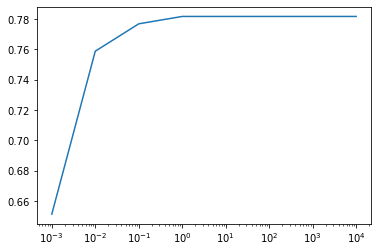

In [23]:
ax = plt.gca()
ax.plot(df['C (1/lambda)'].values,df['Validation Accuracy'].values)
ax.set_xscale('log')

In [ ]:
logreg = LogisticRegression(C=1,penalty='l1',max_iter=1000,solver='liblinear')
logreg.fit(X_train, y_train)
score = logreg.score(X_test, y_test)
print(score)
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X.columns,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)